# Load Python Packages

Load the required packages as follows

In [1]:
import numpy as np
from numpy.linalg import inv, norm
from scipy.sparse.linalg import cg
from sklearn import metrics

# Load functions useful for COMBSS

First make sure that the file 'combss_functions_github.py' is stored the working directory. Then load the all the COMBSS related functions by running the following command.

In [2]:
from combss_functions_github import *

# Generate data from a true model

Generate a low-dimensional dataset as follows.

In [3]:
n = 100
p = 20
beta_type = 1
K0 = 10
beta0, model0 = gen_beta0(p, K0, beta_type)

snr = 6              
rho = 0.5 

meanX = np.zeros(p)
covX = cov_X(p, rho)
noise_var = beta0.T@covX@beta0/snr

np.random.seed(12)

data_train = gen_data(n, p, meanX, covX, noise_var, beta0)
X_train = data_train[0]
y_train = data_train[1]

# Generate a validation set

For tuning the penalty parameter $\lambda$, we generate a validation set as follows. 

In [4]:
n_test = 5000

data_test = gen_data(n_test, p, meanX, covX, noise_var, beta0)
X_test = data_test[0]
y_test = data_test[1]

# Define parameters for COMBSS

Now define the parameters of COMBSS algorithm. Recall 
- $\tau$ is the paramter used to map the final $\mathbf t$ vector to a binary vector $\mathbf s$;
- $\eta$ is the parameter used for speed improvement using truncation approach; 

In [5]:
tau = 0.5
eta = 0.001

# Parameters for termination of the gradient descent
gd_tol = 0.001           # gd_tol is the tolerance of the GD method for termination.
epoch = 10               # GD terminates if the Term_cond is satisfied over epoch number of consecutive iterations.
gd_maxiter = 1000         # max number of iterations allowed by the GD method. 

# Generate a grid of $\lambda$ values

Following command generates a grid of $\lambda$ values as described in the paper.

In [6]:
lam_grid = gen_lam_grid_exp(y_train, 50, 0.8)

# Choose optimizer

ADAM optimizer is used if ADAM = True; otherwise, basic gradient descent is used. See the paper for paramters of the optimizers.

In [7]:
ADAM = True

# Run COMBSS for all the values of $\lambda$

Now we are ready to run COMBSS with the above selected optimizer. The function 'combss_mse' returns final $\mathbf t$ vector and the corresponding $\mathbf s$ vector for each $\lambda$, as well as the mean squared errors.

In [8]:
t_list, model_list, mse_arr = combss_mse(X_train, y_train, X_test, y_test, lam_grid, ADAM=ADAM, tau=tau, eta=eta, epoch=epoch, gd_maxiter=gd_maxiter, gd_tol=gd_tol)


# Summary of the results

The function 'results' summarises the results. 
- It prints optimal $\lambda$ and the corresponding model and the mse;
- It plots $\log(\lambda)$ vs mse;
- It plots $\log(\lambda)$ vs model size;
- It shows the confusion matrix;

True model: [ 0  2  4  6  8 10 12 14 16 18]
Optimal lam: 0.13595223855941158
Optimal model: [ 0  2  4  6  8 10 12 14 16 18] (size: 10)
Optimal MSE: 7.3718833809556905


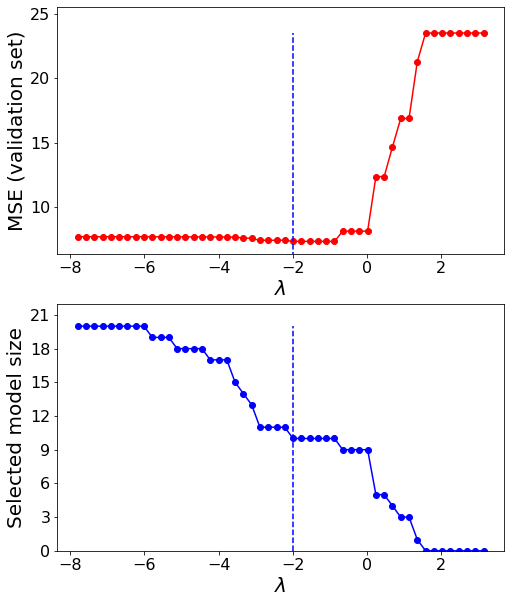

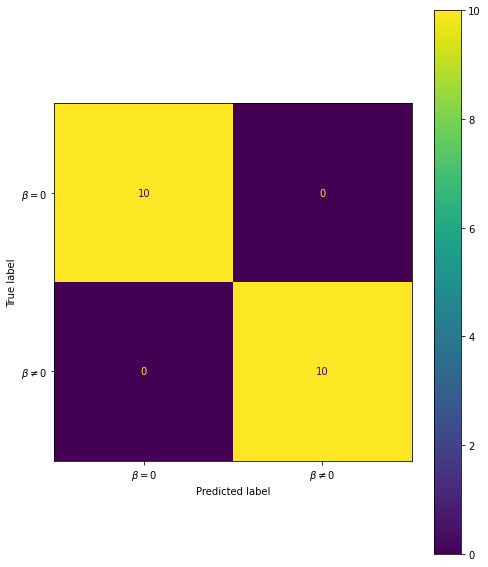

In [9]:
results(beta0, X_train, y_train, lam_grid, model_list, mse_arr)